# Tim Hortons Survey App - Data Analysis

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [2]:
# Read CSV

df = pd.read_csv('TIM HORTONS - APP USAGE2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column                                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                                         --------------  ----- 
 0   Carimbo de data/hora                                                                                                                                                                           42 non-null     object
 1   What is your age?                                                                                                                                                                              42 non-null     object
 2   How often do you 

In [3]:
# Look Data

df.head()

,Carimbo de data/hora,What is your age?,How often do you visit Tim Hortons?,Do you use Tim Hortons App for pre-order and payment?,"If Tim Hortons were to offer rewards points, redeemable for their products, with each transaction made through the mobile application, would you choose to utilize the app for your payments?","Based on your response to the previous question, why would you choose to utilize or not the app for your payments?",Key Word
0,2023/10/22 2:20:35 PM GMT-4,36 - 60,More than once per week,No,Maybe,Thrust in payment system.,preference
1,2023/10/22 2:28:23 PM GMT-4,36 - 60,None,No,Yes,Everything on the same place,preference
2,2023/10/22 2:46:55 PM GMT-4,21 - 35,Once per week,Yes,Yes,"if pre-order by APP, i do not need to wait in ...",efficiency
3,2023/10/22 2:54:13 PM GMT-4,36 - 60,Once per week,No,Maybe,I would use the app if I wanted to consume any...,frequency
4,2023/10/22 2:58:07 PM GMT-4,36 - 60,Once per week,Yes,Yes,Use App is easy and saving waiting time,efficiency


In [4]:
# Clean Collumn Names

df = df.rename(columns={'What is your age?': 'Age', 'How often do you visit Tim Hortons?': 'Frequency of Visiting',
                       'Do you use Tim Hortons App for pre-order and payment?': 'Use app for pre-order',
                       'If Tim Hortons were to offer rewards points, redeemable for their products, with each transaction made through the mobile application, would you choose to utilize the app for your payments?': 'Utilize App for Payments (if Rewards Points)',
                       'Based on your response to the previous question, why would you choose to utilize or not the app for your payments?': 'Open Answer'})
df = df.drop(df.columns[0], axis=1)  # drop first column
df.head()

,Age,Frequency of Visiting,Use app for pre-order,Utilize App for Payments (if Rewards Points),Open Answer,Key Word
0,36 - 60,More than once per week,No,Maybe,Thrust in payment system.,preference
1,36 - 60,None,No,Yes,Everything on the same place,preference
2,21 - 35,Once per week,Yes,Yes,"if pre-order by APP, i do not need to wait in ...",efficiency
3,36 - 60,Once per week,No,Maybe,I would use the app if I wanted to consume any...,frequency
4,36 - 60,Once per week,Yes,Yes,Use App is easy and saving waiting time,efficiency


### Exploratory Data Analysis (EDA)

In [5]:
# Calculate percentages for the "Age" column
age_percentages = df['Age'].value_counts(normalize=True) * 100

# Calculate percentages for the "How often do you visit Tim Hortons" column
visit_percentages = df['Frequency of Visiting'].value_counts(normalize=True) * 100

# Calculate percentages for the "Do you use Tim Hortons App for pre-order and payment" column
app_usage_percentages = df['Use app for pre-order'].value_counts(normalize=True) * 100

# Calculate percentages for the "Utilize App for Payments (Rewards Points)" column
utilize_app_percentages = df['Utilize App for Payments (if Rewards Points)'].value_counts(normalize=True) * 100

print("Age Percentages:")
print(age_percentages)
print("\nVisit Percentages:")
print(visit_percentages)
print("\nApp Usage Percentages:")
print(app_usage_percentages)
print("\nUtilize App Percentages:")
print(utilize_app_percentages)

Age Percentages:
36 - 60    69.047619
21 - 35    28.571429
10 - 20     2.380952
Name: Age, dtype: float64

Visit Percentages:
Once per week              45.238095
None                       33.333333
More than once per week    19.047619
Every day of the week       2.380952
Name: Frequency of Visiting, dtype: float64

App Usage Percentages:
No     66.666667
Yes    33.333333
Name: Use app for pre-order, dtype: float64

Utilize App Percentages:
Yes      57.142857
Maybe    26.190476
No       16.666667
Name: Utilize App for Payments (if Rewards Points), dtype: float64


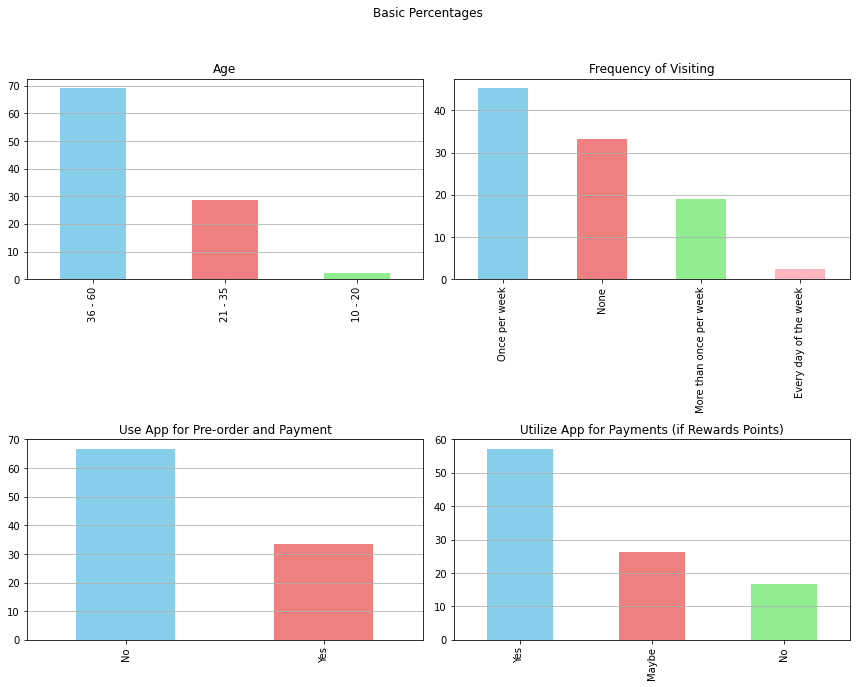

In [6]:
# Set up subplots for each category
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Basic Percentages')
# Define color palettes for each bar plot
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink']


# Plot percentages for "Age"
age_percentages = df['Age'].value_counts(normalize=True) * 100
age_percentages.plot(kind='bar', ax=axes[0, 0], color=colors)
axes[0, 0].set_title("Age")
axes[0, 0].yaxis.grid(True)  # Add horizontal grid lines


# Plot percentages for "How often do you visit Tim Hortons"
visit_percentages = df['Frequency of Visiting'].value_counts(normalize=True) * 100
visit_percentages.plot(kind='bar', ax=axes[0, 1], color=colors)
axes[0, 1].set_title("Frequency of Visiting")
axes[0, 1].yaxis.grid(True)  # Add horizontal grid lines

# Plot percentages for "Do you use Tim Hortons App for pre-order and payment"
app_usage_percentages = df['Use app for pre-order'].value_counts(normalize=True) * 100
app_usage_percentages.plot(kind='bar', ax=axes[1, 0], color=colors)
axes[1, 0].set_title("Use App for Pre-order and Payment")
axes[1, 0].yaxis.grid(True)  # Add horizontal grid lines

# Plot percentages for "Utilize App for Payments (if Rewards Points)"
utilize_app_percentages = df['Utilize App for Payments (if Rewards Points)'].value_counts(normalize=True) * 100
utilize_app_percentages.plot(kind='bar', ax=axes[1, 1], color=colors)
axes[1, 1].set_title("Utilize App for Payments (if Rewards Points)")
axes[1, 1].yaxis.grid(True)  # Add horizontal grid lines

# Adjust subplot layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

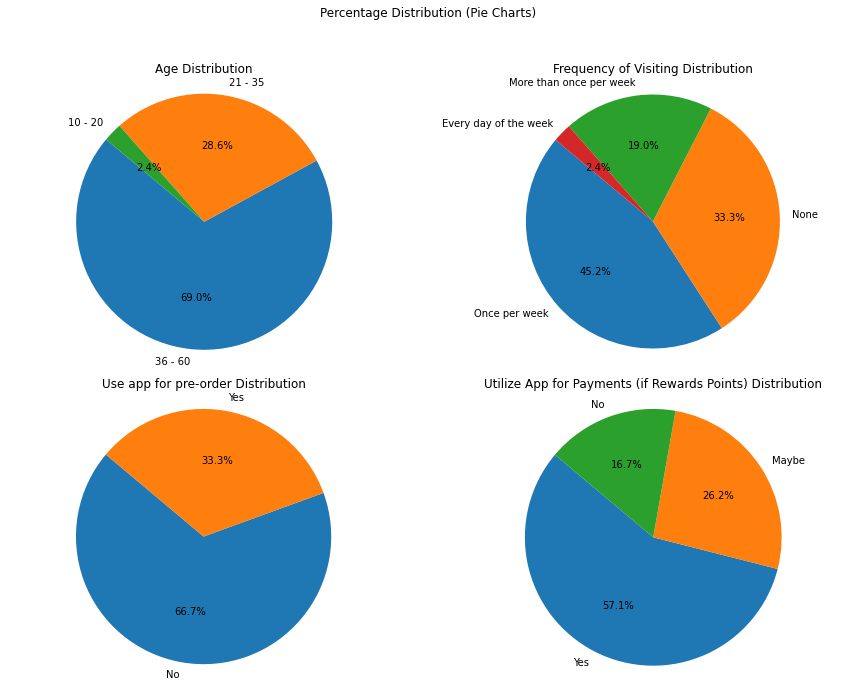

In [7]:
# Define the list of column names for pie charts
columns_to_visualize = ["Age", "Frequency of Visiting", "Use app for pre-order", "Utilize App for Payments (if Rewards Points)"]

# Set up subplots for the pie charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Percentage Distribution (Pie Charts)')

# Generate pie charts for each selected column
for i, column in enumerate(columns_to_visualize):
    percentages = df[column].value_counts(normalize=True) * 100
    ax = axes[i // 2, i % 2]
    ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{column} Distribution')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust subplot layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the pie charts
plt.show()

### Correlations between Age and Use app for pre-order

In [8]:
# Create a contingency table for Age and App Usage
contingency_table = pd.crosstab(df['Age'], df['Use app for pre-order'])

# Perform a chi-squared test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-squared test statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("There is a significant relationship between Age and App Usage.")
else:
    print("There is no significant relationship between Age and App Usage.")

Chi-squared test statistic: 0.9439655172413793
p-value: 0.6237642673813751
There is no significant relationship between Age and App Usage.


Chi-squared test statistic for Age vs Frequency of Visiting: 7.43
P-value: 0.2828
There is no significant relationship between the columns.

Chi-squared test statistic for Age vs Use app for pre-order: 0.94
P-value: 0.6238
There is no significant relationship between the columns.

Chi-squared test statistic for Age vs Utilize App for Payments (if Rewards Points): 5.36
P-value: 0.2520
There is no significant relationship between the columns.

Chi-squared test statistic for Frequency of Visiting vs Use app for pre-order: 2.23
P-value: 0.5257
There is no significant relationship between the columns.

Chi-squared test statistic for Frequency of Visiting vs Utilize App for Payments (if Rewards Points): 3.28
P-value: 0.7727
There is no significant relationship between the columns.

Chi-squared test statistic for Use app for pre-order vs Utilize App for Payments (if Rewards Points): 7.05
P-value: 0.0294
There is a significant relationship between the columns.



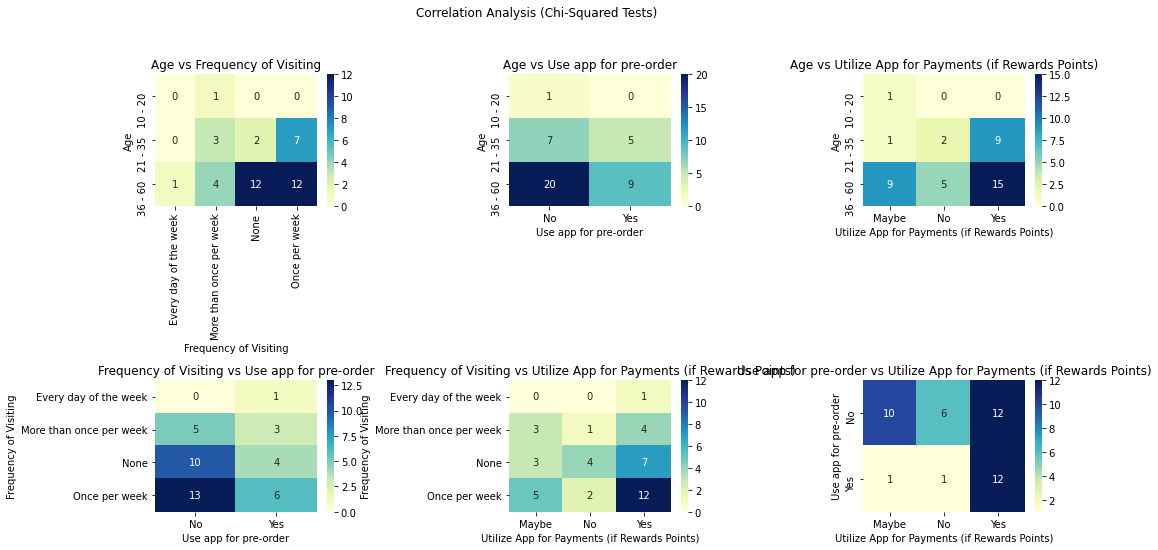

In [9]:
# Create a function to perform chi-squared tests and display results
def chi_squared_test(df, column1, column2):
    contingency_table = pd.crosstab(df[column1], df[column2])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"Chi-squared test statistic for {column1} vs {column2}: {chi2:.2f}")
    print(f"P-value: {p:.4f}")

    if p < 0.05:
        print("There is a significant relationship between the columns.")
        print()
    else:
        print("There is no significant relationship between the columns.")
        print()

# List of relevant column pairs for correlation analysis
column_pairs = [("Age", "Frequency of Visiting"), ("Age", "Use app for pre-order"), 
                ("Age", "Utilize App for Payments (if Rewards Points)"),
                ("Frequency of Visiting", "Use app for pre-order"), 
                ("Frequency of Visiting", "Utilize App for Payments (if Rewards Points)"),
                ("Use app for pre-order", "Utilize App for Payments (if Rewards Points)")]

# Create subplots for the correlation analysis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Correlation Analysis (Chi-Squared Tests)')

# Perform chi-squared tests and visualize results for each column pair
for i, (column1, column2) in enumerate(column_pairs):
    chi_squared_test(df, column1, column2)
    contingency_table = pd.crosstab(df[column1], df[column2])
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"{column1} vs {column2}")

# Adjust subplot layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

**First conclusion: There is no mathematical correlation between ages and the use of the app. So, for now, there is no meaning in making a campaign for a specific target age to use the app.**

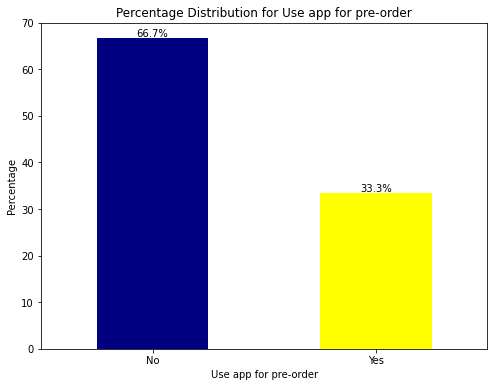

In [10]:
# Choose the column to create the percentage bar graph for
column_to_visualize = "Use app for pre-order"

# Calculate the percentages for the chosen column
percentages = df[column_to_visualize].value_counts(normalize=True) * 100

# Create a percentage bar graph
plt.figure(figsize=(8, 6))
colors = ['navy', 'yellow']  # Define custom colors
percentages.plot(kind='bar', color=colors)
plt.title(f'Percentage Distribution for {column_to_visualize}')
plt.xlabel(column_to_visualize)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Add percentage values above the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Show the bar graph
plt.show()

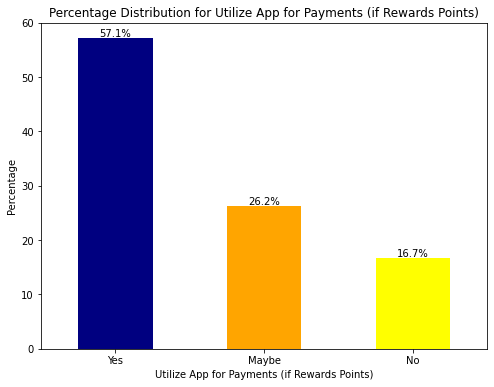

In [11]:
# Choose the column to create the percentage bar graph for
column_to_visualize = "Utilize App for Payments (if Rewards Points)"

# Calculate the percentages for the chosen column
percentages = df[column_to_visualize].value_counts(normalize=True) * 100

# Create a percentage bar graph
plt.figure(figsize=(8, 6))
colors = ['navy', 'orange', 'yellow']  # Define custom colors
percentages.plot(kind='bar', color=colors)
plt.title(f'Percentage Distribution for {column_to_visualize}')
plt.xlabel(column_to_visualize)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Add percentage values above the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

# Show the bar graph
plt.show()

**Second important observation: 66.7% already use Tim Hortons cards, but usually they not pay with it. If there is rewards, 57.1% will use the card as form of payment.**

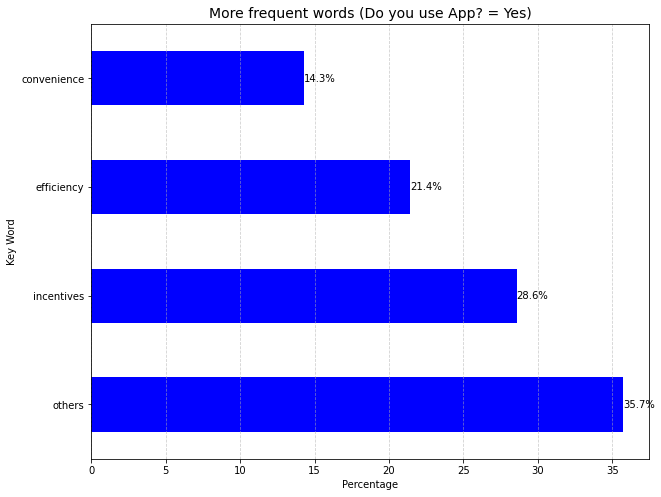

In [12]:
# Filter the DataFrame for "Do you use App for pre-order and payment?" = "Yes"
subset = df[df["Use app for pre-order"] == "Yes"]

# Calculate the percentages for each "Key Word" in the subset
keyword_percentages = subset["Key Word"].value_counts(normalize=True) * 100

# Sort keywords by percentage in descending order
keyword_percentages = keyword_percentages.sort_values(ascending=False)

# Create a horizontal bar graph
plt.figure(figsize=(10, 8))
keyword_percentages.plot(kind='barh', color='blue')
plt.title("More frequent words (Do you use App? = Yes)", fontsize=14)
plt.xlabel("Percentage")
plt.ylabel("Key Word")

# Add percentage values next to the bars
for i, percentage in enumerate(keyword_percentages):
    plt.text(percentage, i, f'{percentage:.1f}%', va='center')

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)
    
# Show the bar graph
plt.show()

**Conclusion: The most important reason for a person use the Tim Hortons card is INCENTIVES (rewards)**

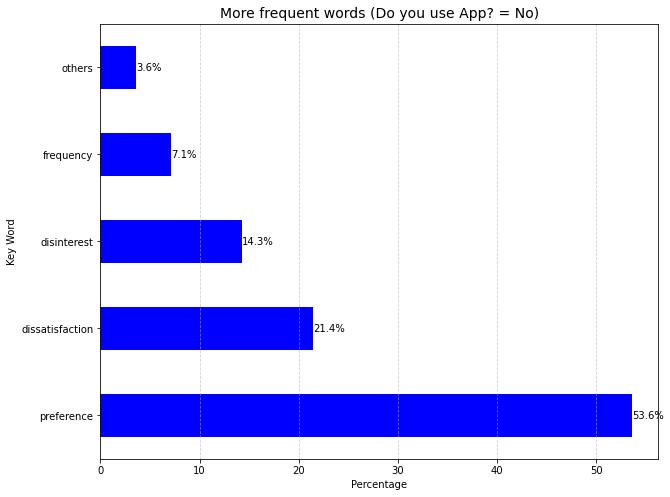

In [13]:
# Filter the DataFrame for "Do you use App for pre-order and payment?" = "No"
subset = df[df["Use app for pre-order"] == "No"]

# Calculate the percentages for each "Key Word" in the subset
keyword_percentages = subset["Key Word"].value_counts(normalize=True) * 100

# Sort keywords by percentage in descending order
keyword_percentages = keyword_percentages.sort_values(ascending=False)

# Create a horizontal bar graph
plt.figure(figsize=(10, 8))
keyword_percentages.plot(kind='barh', color='blue')
plt.title("More frequent words (Do you use App? = No)", fontsize=14)
plt.xlabel("Percentage")
plt.ylabel("Key Word")

# Add percentage values next to the bars
for i, percentage in enumerate(keyword_percentages):
    plt.text(percentage, i, f'{percentage:.1f}%', va='center')

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)
    
# Show the bar graph
plt.show()

**Important: 53.6% of people do not use the app now because they prefer use cash in their finantial transictions. The second major reason is dissatisfaction using apps for payment in the past.**